In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
from matplotlib import pyplot as plt 

%matplotlib inline

In [3]:
# Set random Seed
np.random.seed(28)

In [4]:
DATA_ARCHIVE = os.path.join('..', 'fer2013.tar.gz')
DATA_FOLDER = os.path.join('..', 'fer2013')

#### Uncompress Dataset File

In [5]:
if not os.path.exists(DATA_FOLDER):
    import tarfile
    try:
        file = tarfile.open(DATA_ARCHIVE, mode='r:gz')
        try: 
            file.extractall()
        finally: 
            file.close()
    except FileNotFoundError:
        print('File Not Found')
    else:
        file.close()
else:
    print('Data Folder found: {}'.format(DATA_FOLDER))

Data Folder found: ../fer2013


In [6]:
DATASET = os.path.join(DATA_FOLDER, 'fer2013.csv')

In [7]:
EMOTION_MAP = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6:'Neutral'}

In [8]:
df = pd.read_csv(DATASET)

In [9]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [10]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


###  Read and Show the first Image in the Dataset

In [11]:
def load_image_numpy(pixels):
    return np.fromstring(pixels, dtype=np.uint8, sep=' ')

In [12]:
img = load_image_numpy(df.pixels[0])

In [13]:
img.shape

(2304,)

In [14]:
img = img.reshape(48, 48)

In [15]:
from functools import partial

In [16]:
text_annotation = partial(plt.text, x=36, y=46, fontdict={'color': 'red', 'fontsize': 10, 'ha': 'center', 
                                                          'va': 'center', 
                                                          'bbox': dict(boxstyle="round", fc="white", 
                                                                       ec="black", pad=0.2)})

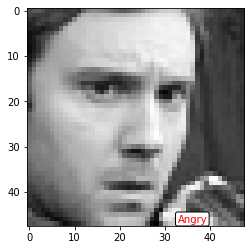

In [17]:
plt.imshow(img, cmap=plt.gray())
text_annotation(s=EMOTION_MAP[df.emotion[0]])
plt.show()

### Overview of the Dataset

In [18]:
def overview(samples):
    """
    The function is used to plot first 
    several pictures for overviewing 
    image dataset.
    """
    fig = plt.figure(figsize=(25,25))
    image_shape = (48, 48)
    for i, (em_label, bytestring) in enumerate(samples):
        ax = fig.add_subplot(10,10,i+1)
        comp = np.fromstring(bytestring, dtype=np.uint8, sep=' ')
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='bilinear',
                   vmin=-vmax, vmax=vmax)
        text_annotation(s='{}-{}'.format(str(i+1).zfill(2), em_label))
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

In [19]:
SAMPLE_SIZE = 100
samples = np.random.choice(np.arange(df.shape[0]), size=SAMPLE_SIZE, replace=False)
samples = [(EMOTION_MAP[df.emotion[idx]], df.pixels[idx]) for idx in samples]

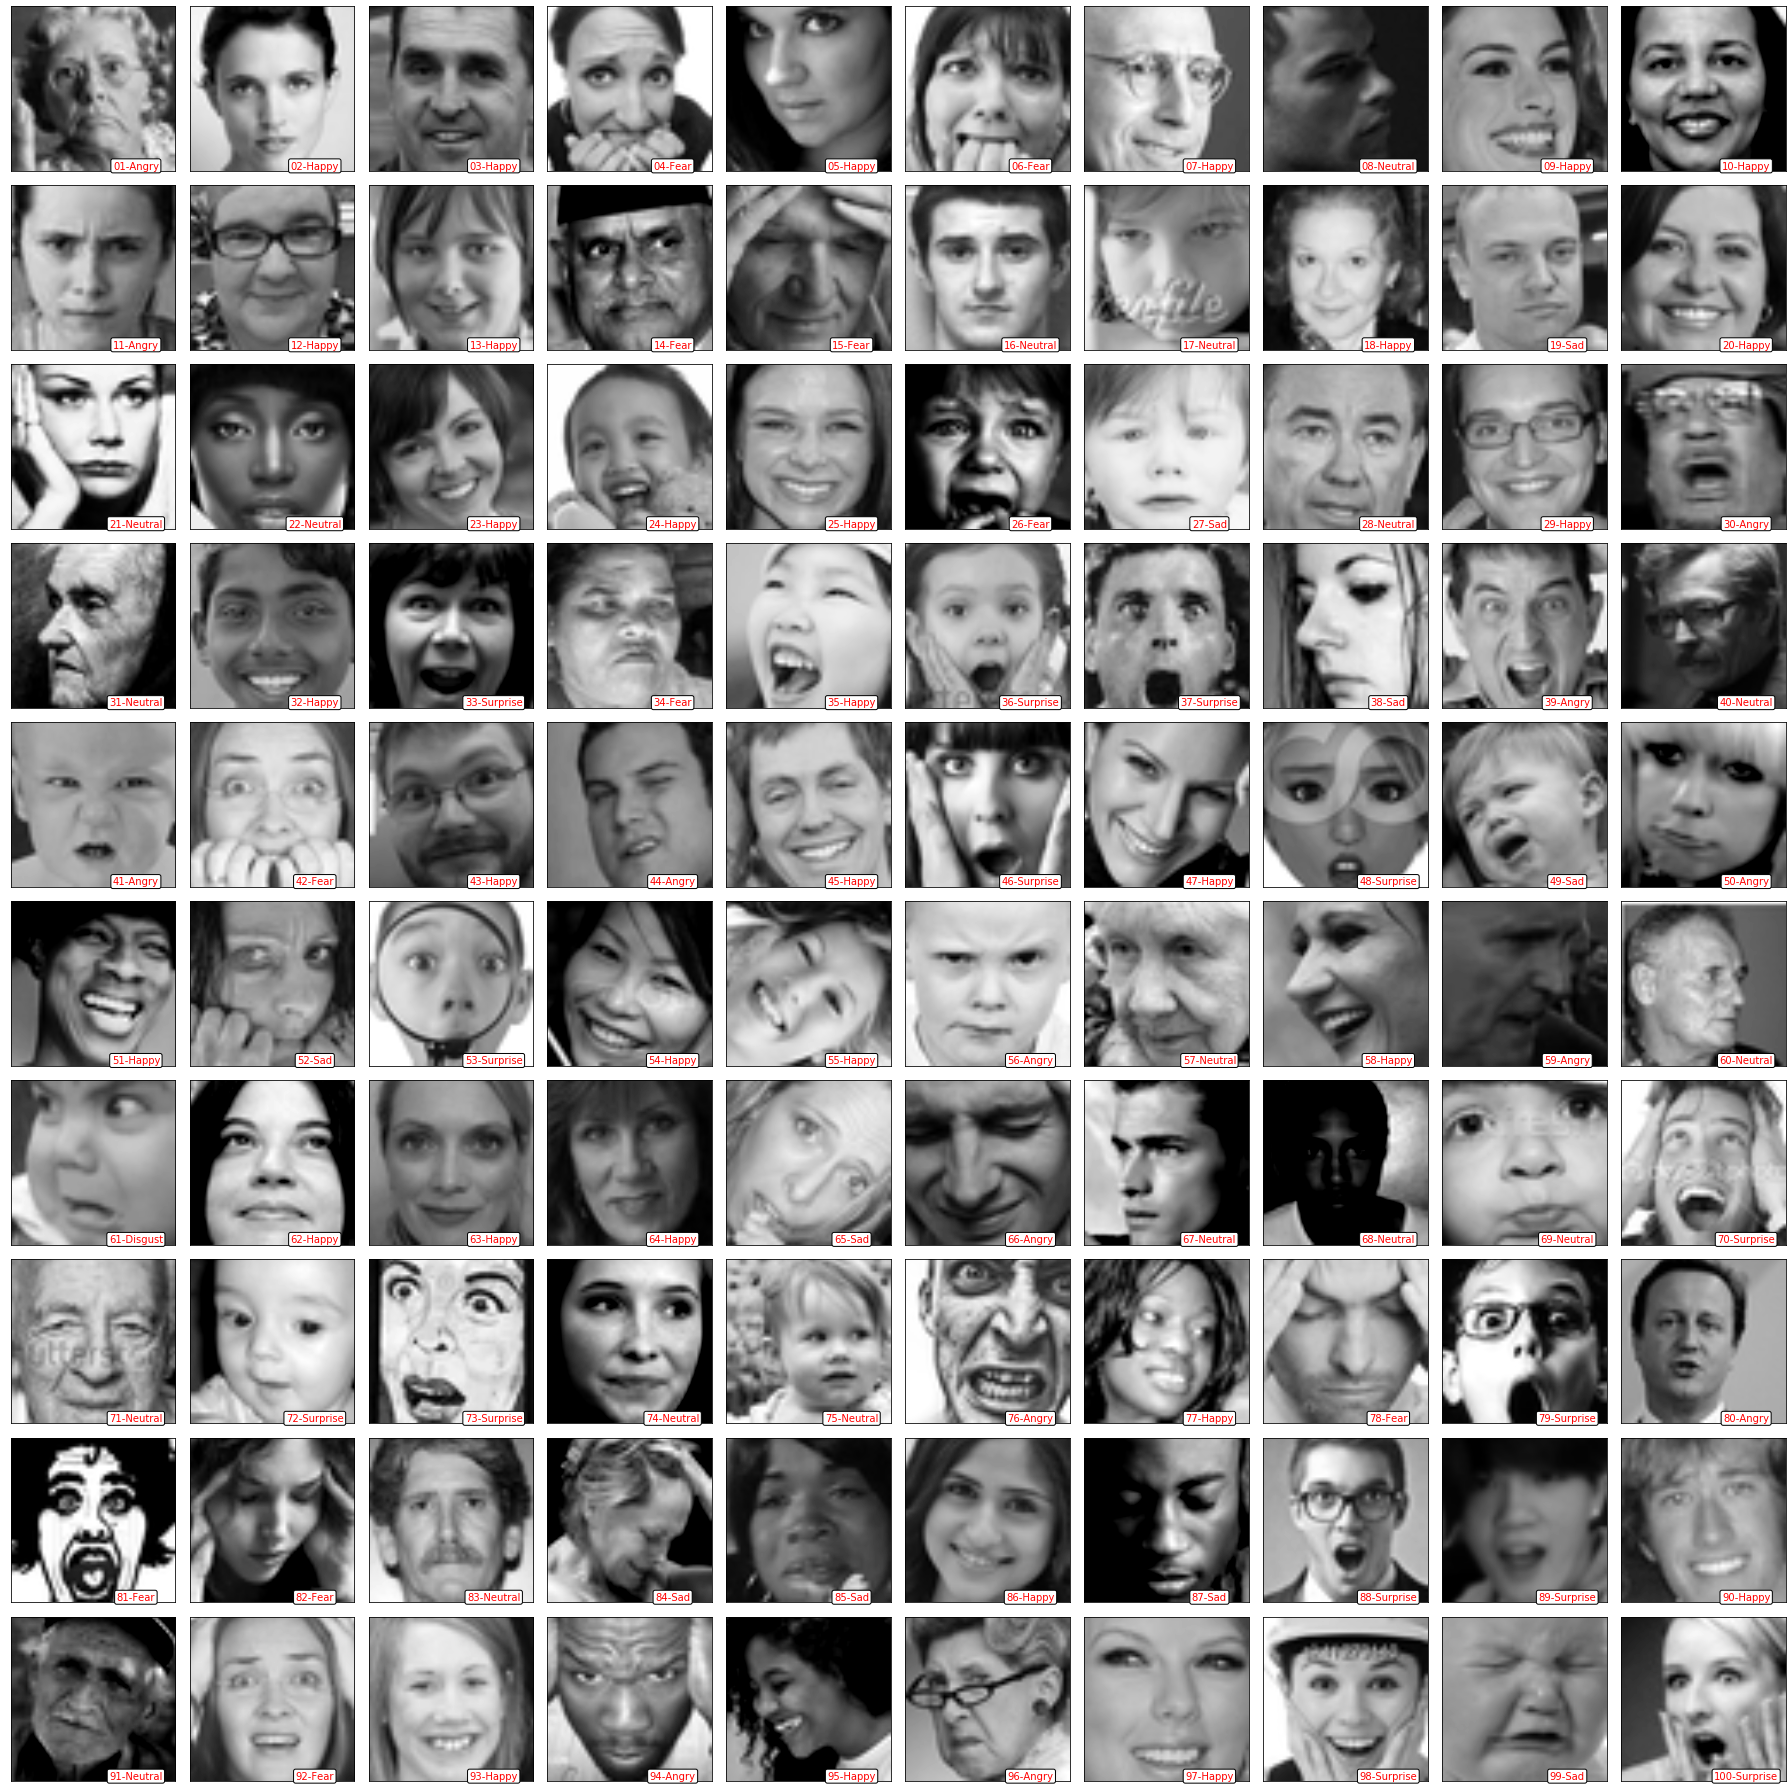

In [20]:
overview(samples)

##  `Count` Statistics by emotion

In [21]:
df.shape

(35887, 3)

In [22]:
df_count = df.groupby('emotion').count()
df_count['Emotion Label'] = [EMOTION_MAP[i] for i in df_count.index.values]

In [23]:
df_count

,pixels,Usage,Emotion Label
emotion,,,
0,4953,4953,Angry
1,547,547,Disgust
2,5121,5121,Fear
3,8989,8989,Happy
4,6077,6077,Sad
5,4002,4002,Surprise
6,6198,6198,Neutral


### Statistics per Dataset (Training, Validation, Test)

In [24]:
df.columns

Index(['emotion', 'pixels', 'Usage'], dtype='object')

In [25]:
df.Usage.value_counts()

Training       28709
PrivateTest     3589
PublicTest      3589
Name: Usage, dtype: int64

In [26]:
df['data-set'] = df.Usage.apply(lambda v: 'training' if v == 'Training' else 'validation' if v == 'PrivateTest' else 'test')

In [27]:
df['data-set'].unique()

array(['training', 'test', 'validation'], dtype=object)

In [28]:
ds_stat = df.groupby('data-set').emotion.value_counts().unstack()

In [30]:
ds_stat.columns = list(map(lambda v: EMOTION_MAP[v], ds_stat.columns.values))

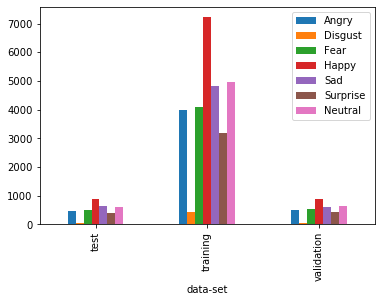

In [31]:
ds_stat.plot(kind='bar')
plt.show()

In [32]:
emo_stat = df.groupby('emotion')['data-set'].value_counts().unstack()

In [33]:
emo_stat

data-set,test,training,validation
emotion,,,
0,467,3995,491
1,56,436,55
2,496,4097,528
3,895,7215,879
4,653,4830,594
5,415,3171,416
6,607,4965,626


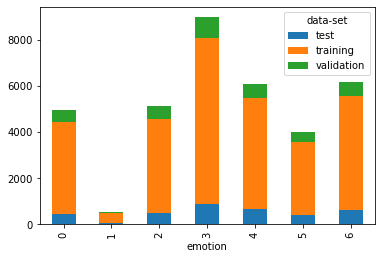

In [35]:
emo_stat.plot(kind='bar', stacked=True)
plt.show()